In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('masked_kiva_loans.csv')

In [ ]:
df.isnull().sum()

id                      0
funded_amount           0
loan_amount             0
sector                  0
country                 0
partner_id            634
term_in_months          0
lender_count            0
borrower_genders      195
repayment_interval      0
date                    0
dtype: int64

In [ ]:
df['partner_id'].fillna(0,inplace= True)
df.isnull().sum()
df['partner_id'] = df['partner_id'].astype(int)

In [ ]:
df['borrower_genders'].describe()

count      33366
unique      1032
top       female
freq       21264
Name: borrower_genders, dtype: object

In [ ]:
df['borrower_genders'].fillna(df['borrower_genders'].mode, inplace= True)
df.isnull().sum()

id                    0
funded_amount         0
loan_amount           0
sector                0
country               0
partner_id            0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

In [ ]:
def negativeve_values (col):
    has_negative = (df[col] < 0).any()
    print('Column Name : ', col, 'Has Negive Values ? => ', has_negative)
negativeve_values('lender_count')

Column Name :  lender_count Has Negive Values ? =>  False


In [ ]:
def remove_outliers_and_plot(df, column):
    seventy_fifth = df[column].quantile(0.75)
    twenty_fifth = df[column].quantile(0.25)
    iqr = seventy_fifth - twenty_fifth
    upper_outlier = seventy_fifth + 1.5 * iqr
    lower_outlier = twenty_fifth - 1.5 * iqr
    no_outlier_df = df[(df[column] > lower_outlier) & (df[column] < upper_outlier)]
    plt.boxplot(no_outlier_df[column])
    plt.title(f'Boxplot of {column} (Outliers Removed)')
    plt.ylabel(column)
    plt.show()
    return no_outlier_df

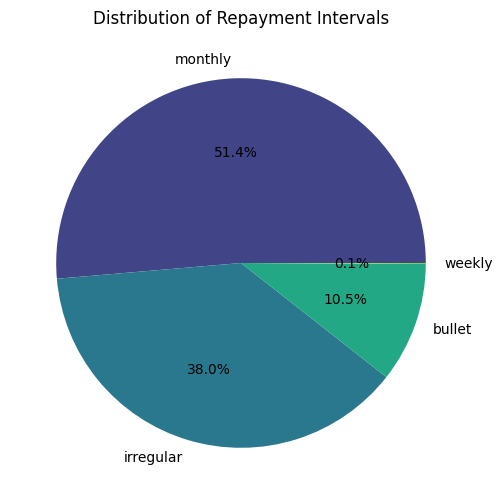

In [ ]:
repayment_count = df['repayment_interval'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(repayment_count, labels=repayment_count.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(repayment_count)))
plt.title('Distribution of Repayment Intervals')
plt.show()

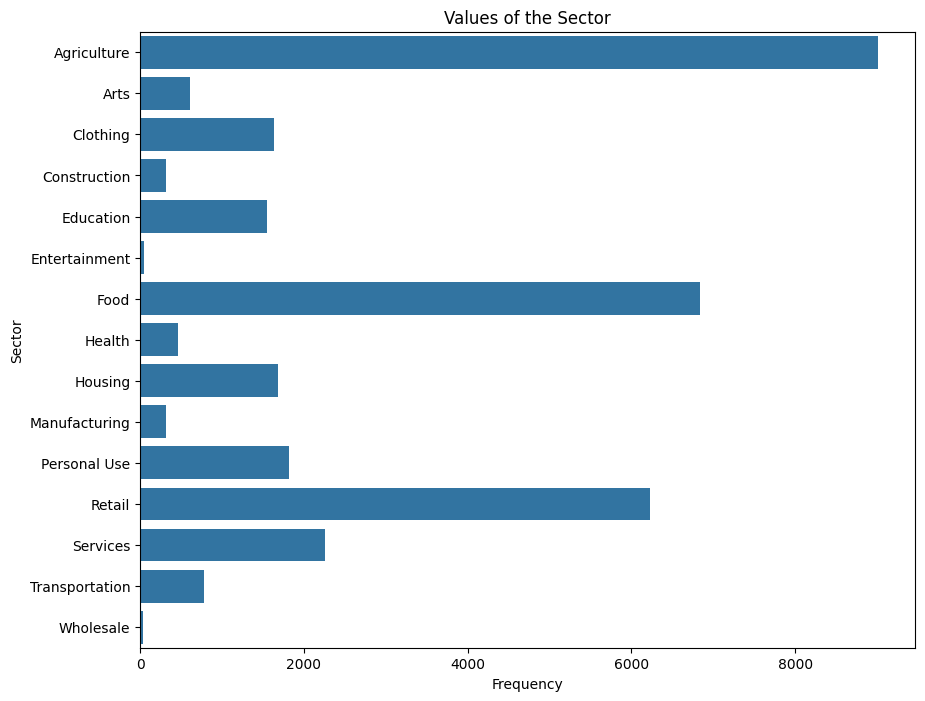

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(y= 'sector', data = df)
plt.ylabel('Sector')
plt.xlabel('Frequency')
plt.title('Values of the Sector')
plt.show()